<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/MLP/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja wieloklasowa - Fashion MNIST

### 1. Import bibliotek

In [3]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# opcje wyswietlania dla numpy i pandas
np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
print(tf.__version__)

2.1.0-rc1


### 2. Załadowanie danych i wstępna eksploracja

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

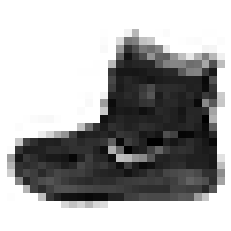

In [10]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

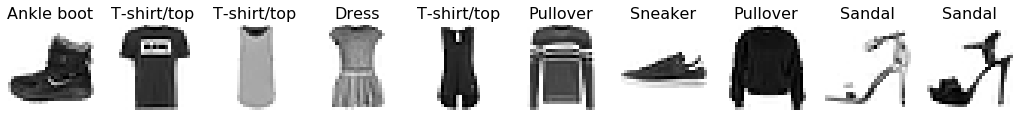

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

### 3. Budowa modelu

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**batch_size** - rozmiar wsadu

**validation split** - procent danych użytych do walidacji

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 275us/sample - loss: 0.4958 - accuracy: 0.8229 - val_loss: 0.4016 - val_accuracy: 0.8544
Epoch 2/10
48000/48000 [==============================] - 12s 255us/sample - loss: 0.3767 - accuracy: 0.8630 - val_loss: 0.3665 - val_accuracy: 0.8662
Epoch 3/10
48000/48000 [==============================] - 12s 256us/sample - loss: 0.3384 - accuracy: 0.8753 - val_loss: 0.3855 - val_accuracy: 0.8633
Epoch 4/10
48000/48000 [==============================] - 12s 254us/sample - loss: 0.3163 - accuracy: 0.8847 - val_loss: 0.3539 - val_accuracy: 0.8773
Epoch 5/10
48000/48000 [==============================] - 13s 264us/sample - loss: 0.2985 - accuracy: 0.8901 - val_loss: 0.3446 - val_accuracy: 0.8780
Epoch 6/10
48000/48000 [==============================] - 12s 254us/sample - loss: 0.2853 - accuracy: 0.8936 - val_loss: 0.3830 - val_accuracy: 0.8644
Epoch 7/10
48000/48000 [====================

In [20]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.495830,0.822917,0.401582,0.854417,0
1,0.376687,0.862958,0.366451,0.866250,1
2,0.338408,0.875292,0.385503,0.863333,2
3,0.316297,0.884708,0.353857,0.877250,3
4,0.298496,0.890063,0.344633,0.878000,4
5,0.285277,0.893646,0.383034,0.864417,5
6,0.272431,0.899479,0.355696,0.877000,6
7,0.262928,0.902458,0.329424,0.886750,7
8,0.252788,0.906125,0.345590,0.878750,8
9,0.244011,0.909146,0.375764,0.873750,9


### 4. Ocena modelu

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_acc)

0.8659


### 5. Predykcja na podstawie modelu


*   **model.evaluate(y_true, y_pred)** - metryki modelu
*   **model.predict_classes()** - przewidziane klasy
*   **model.predict_proba(), model.predict()** - prawdopodobieństwo klasy

In [25]:
predictions = model.predict(X_test)
predictions

array([[0.000000001437, 0.000000000005, 0.000000000147, ..., 0.001935537   , 0.000000006037, 0.99754566    ],
       [0.00014368139 , 0.            , 0.99953234    , ..., 0.            , 0.000000000005, 0.            ],
       [0.000000000118, 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000515614, 0.            , 0.000000023993, ..., 0.000000005208, 0.99999535    , 0.            ],
       [0.000000000543, 0.9999858     , 0.            , ..., 0.            , 0.000000000442, 0.            ],
       [0.000001879925, 0.000000000072, 0.000004535212, ..., 0.00036286432 , 0.000049704235, 0.000008685458]], dtype=float32)

In [26]:
# powyzszy zapis jako obiekt biblioteki Pandas
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000519,0.000000,0.001936,0.000000,0.997546
1,0.000144,0.000000,0.999532,0.000000,0.000040,0.000000,0.000285,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.409465,0.000000,0.012919,0.000072,0.000436,0.000000,0.577040,0.000000,0.000066,0.000001


In [27]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

### 6. Eksloracja predykcji

In [40]:
#@title Wybierz indeks zdjęcia:
idx = 6236 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
  color = 'green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names,
                     y=predictions_df.iloc[idx],
                     orientation='v',
                     marker_color=color))
fig.update_layout(width=800, 
                  title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)

### 7. Błędnie sklasyfikowane obrazy

In [47]:
#@title Wybierz indeks zdjęcia:

misclassified = []
# iterujemy gdzie klasy się nie zgadzają
# i dodajemy indeks do listy
for idx, _ in enumerate(X_test):
  if predictions_cls[idx] != y_test[idx]:
    misclassified.append(idx)

index_mapper = {}

for idx, idx_real in enumerate(misclassified):
  index_mapper[idx] = idx_real

idx = 1081 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]],
                     orientation='v',
                     marker_color='red'))

fig.update_layout(width=800,
                  title=(f' Etykieta: {class_names[y_test[index_mapper[idx]]]}'
                  f' ~ Predykcja: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)